# ICE - ONLINE STORE

## Descripción del proyecto

Trabajo para la tienda online Ice la cual vende videojuegos por todo el mundo. 

Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Los datos que trabajaré son del 2016.

NOTA: Es posible que los datos de 2016 estén incompletos.

## Objetivo

Identificar patrones que determinen si un juego tiene éxito o no con la finalidad de planear una campaña para el 2017.

## Carga de datos y librerias

In [18653]:
# Cargaré todas las librerías que necesito.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import factorial

In [18654]:
# Cargaré los datos.
df_games = pd.read_csv('games.csv')

## Preparación de datos

In [18655]:
# Observaré las primeras filas de mi Dataframe.
df_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [18656]:
df_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

La descripción de los datos es la siguiente:


* Name: Nombre del juego

* Platform: Nombre de la plataforma

* Year_of_Release: Año de lanzamiento

* Genre: Género 

* NA_sales: Ventas en Norteamérica en millones de dólares estadounidenses

* EU_sales: Ventas en Europa en millones de dólares estadounidenses

* JP_sales: Ventas en Japón en millones de dólares estadounidenses

* Other_sales: Ventas en otros países en millones de dólares estadounidenses

* Critic_Score: El valor máximo es 100 

* User_Score: El valor máximo es 10 

* Rating: ESRB (Entertainment Software Rating Board - Junta de clasificación de software de entretenimiento). 
  Evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

In [18657]:
# Veré una descripción general de los datos.
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [18658]:
# Revisaré el tipo de datos que tengo y los posibles datos ausentes.
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Mis primeros hallazgos son los siguientes:

* Observo datos relacionados con diferentes juegos y las ventas en diferentes regiones durante el 2016.
  
* Hay algunos datos ausentes que debo revisar y reemplazar según lo crea conveniente.

* Tambien puedo ver que hay algunas variables que tienen un tipo de datos no adecuado. Para ellas, cambiaré el tipo de dato y ajustaré los decimales a 2 cifras únicamente.

* En cuanto a las ventas, observo valores máximos muy alejados del promedio en todas las variables relacionadas con este tema lo que me hace deducir que son valores atípicos. Más adelante lo revisaré.
  
* Cambiaré los encabezados para que tengan un formato homogéneo y en minúsculas.

### Corrección de datos

In [18659]:
# Reemplazaré los nombres de las columnas para cambiarlos a minúsculas, quitar espacios y separar palabras con guión bajo.
new_col_names = []
for old_name in df_games.columns:
	name_stripped = old_name.strip()
	name_lowered = name_stripped.lower()
	name_no_spaces= name_lowered.replace(' ', '_')
	new_col_names.append(name_no_spaces)
df_games.columns = new_col_names
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Revisión de datos (Parte 1)

In [18660]:
#Revisaré los datos de cada variable para conocer un poco más mis datos y ver si hay nulos.
print(df_games['name'].unique())

print()

print(df_games['platform'].unique())

print()

print(df_games['year_of_release'].unique())

print()

print(df_games['genre'].unique())

print()

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]



In [18661]:
# Revisaré los datos nulos en 'name'.
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [18662]:
# Revisaré la plataforma GEN en 1993.
gen_1993 = df_games[(df_games['platform'] == 'GEN') & (df_games['year_of_release'] == 1993.)]
gen_1993


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


No hay muchos datos acerca de estas dos filas, pero considerando que solo son dos, no afecta mi análisis si las dejo así que les pondré 'Desconocido'.

In [18663]:
# Cambiaré los nulos por 'Desconocido'.
df_games['name'] = df_games['name'].fillna('Desconocido')

In [18664]:
# Revisaré los datos nulos en 'year_of_release'.
df_games[df_games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [18665]:
# Cambiaré los valores nulos del año de realización por cero y pasaré los datos de float a int.
df_games['year_of_release'] = df_games['year_of_release'].fillna(0)
df_games['year_of_release'] = df_games['year_of_release'].astype(int)
df_games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,    0, 1995,
       1991, 1981, 1987, 1980, 1983])

In [18666]:
# Revisaré los datos nulos en 'genre'.
df_games[df_games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Desconocido,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Desconocido,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Observo que son exactamente las dos filas que vimos en el caso anterior así que las dejaré también como 'Desconocido'.

In [18667]:
# Cambiaré los nulos por 'Desconocido'.
df_games['genre'] = df_games['genre'].fillna('Desconocido')

#### Revisión de datos (Parte 2)

In [18668]:
#Redondeo a 2 decimales
df_games['na_sales'] = df_games['na_sales'].round(2)
df_games['na_sales'].value_counts()

na_sales
0.00     4508
0.02      576
0.03      561
0.04      549
0.01      545
         ... 
3.68        1
2.98        1
2.61        1
3.04        1
41.36       1
Name: count, Length: 402, dtype: int64

In [18669]:
#Redondeo a 2 decimales
df_games['eu_sales'] = df_games['eu_sales'].round(2)
df_games['eu_sales'].value_counts()

eu_sales
0.00     5870
0.01     1494
0.02     1308
0.03      926
0.04      709
         ... 
1.87        1
1.75        1
1.44        1
1.60        1
28.96       1
Name: count, Length: 307, dtype: int64

In [18670]:
#Redondeo a 2 decimales
df_games['jp_sales'] = df_games['jp_sales'].round(2)
df_games['jp_sales'].value_counts()

jp_sales
0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
3.14        1
2.73        1
3.18        1
3.63        1
0.97        1
Name: count, Length: 244, dtype: int64

In [18671]:
#Redondeo a 2 decimales
df_games['other_sales'] = df_games['other_sales'].round(2)
df_games['other_sales'].value_counts()

other_sales
0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
2.11       1
7.53       1
1.21       1
1.79       1
0.93       1
Name: count, Length: 155, dtype: int64

#### Revisión de datos (Parte 3)

In [18672]:
print(df_games['critic_score'].unique())

print()

print(df_games['user_score'].unique())

print()

print(df_games['rating'].unique())

print()

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']



In [18673]:
# Revisare los datos nulos en 'critic_score'.
df_games[df_games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Considerando que tengo 8578 filas con nan y que hay valores atípicos en esta variable, lo mejor es reemplazar los nan por la mediana.

In [18674]:
# Reemplazaré los datos nulos con la mediana y convertiré toda la variable a enteros.
median_critic_score = df_games['critic_score'].median()
df_games['critic_score'] = df_games['critic_score'].fillna(median_critic_score).astype(int)

In [18675]:
# Revisare los datos nulos en 'user_score'.
df_games[df_games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,71,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,71,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,71,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71,NaN,NaN


En este caso, tengo 6701 filas con nan y, según la descripción general, hay valores atípicos en esta variable por lo que es mejor reemplazar los nan por la mediana de los valores.

In [18676]:
# Revisare los datos 'tbd' en 'user_score'.
df_games[df_games['user_score'] == 'tbd']

/Users/brisna/github_projects/tripleten/.venv/lib/python3.12/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,71,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,71,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,71,tbd,E


Para este caso, 'tbd' indica que se le ha dado una calificación. Por lo tanto, al igual que a los datos nulos, le asignare el valor de la mediana.

In [18677]:
# Convertiré la variable 'user_score' a númerica. Esto cambiará 'tbd' a nan y podré obtener la mediana.
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
# Reemplazaré los datos nulos con la mediana y convertiré toda la variable a decimales.
median_user_score = df_games['user_score'].median()
df_games['user_score'] = df_games['user_score'].fillna(median_user_score).astype(float)

In [18678]:
# Revisare los datos nulos en 'rating'.
df_games[df_games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,7.5,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,7.5,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,71,7.5,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,71,7.5,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,71,7.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71,7.5,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71,7.5,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71,7.5,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71,7.5,NaN


Al igual que en los casos anteriores, reemplazaré los datos nulos por 'Desconocido'.

In [18679]:
# Reemplazaré los datos nulos con 'Desconocido'.
df_games['rating'] = df_games['rating'].fillna('Desconocido')

Por último revisaré que no haya filas duplicadas.

In [18680]:
# Reviso los datos duplicados.
duplicated_rows = df_games.duplicated().sum()
duplicated_rows

np.int64(0)

In [18681]:
# Verifico que ya no tenga datos nulos.
data_na = df_games.isna().sum()
data_na

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [18682]:
# Verifico el tipo de datos.
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [18683]:
df_games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.00000
mean,1974.193599,0.263377,0.145060,0.077617,0.047342,70.010649,7.32974
std,252.559930,0.813604,0.503339,0.308853,0.186731,9.777494,1.02785
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.00000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,71.000000,7.50000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.50000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,71.000000,7.50000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.70000


¿Por qué había valores ausentes en critic_score, user_score y rating?

* Probablemente son juegos que no fueron calificados.
  
* Quizá hay juegos relativamente nuevos.
  
* Probablemente son juegos no tan populares y por eso no se calificaron.
  
* Puede que hayan juegos con una popularidad fugaz y por eso no se calificaron.

RESUMEN

* Le dí formato a los encabezados para que fueran más homogéneos.

* Encontré dos filas que no tienen nombre ni género pero, al ser tan pocas, no afecta a mis datos. Las dejaré porque contienen información sobre las ventas.
  
* Encontre datos ausentes en las 3 variables de score que tengo y las reemplacé por la mediana para no afectar la integridad de los datos con un dato sesgado ya que existen valores atípicos en las tres variables.

* Con estos cambios, puedo observar que:
  
  Hay videojuegos lanzados desde 1980 hasta el 2016.

  El promedio de ventas es de 0.263377 para Norteamérica, 0.145060 para Europa, 0.077617 para Japón y 0.047342 para otros (millones de dólares).

  El puntuaje promedio de critic_score es de 70.01 puntos y de user_score es de 7.32 




## Análisis de datos

In [18684]:
# Calcularé las ventas totales (la suma de las ventas en todas las regiones) para cada juego y colocaré estos valores en una columna separada.
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df_games['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16715, dtype: float64

In [18685]:
# Veré cuántos juegos fueron lanzados en cada año sin considerar el año 0 (referente a los datos nulos).
games_count_year = df_games.groupby('year_of_release')['name'].count().reset_index()
games_count_year = games_count_year[games_count_year['year_of_release'] != 0] 
games_count_year


,year_of_release,name
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15
10,1989,17


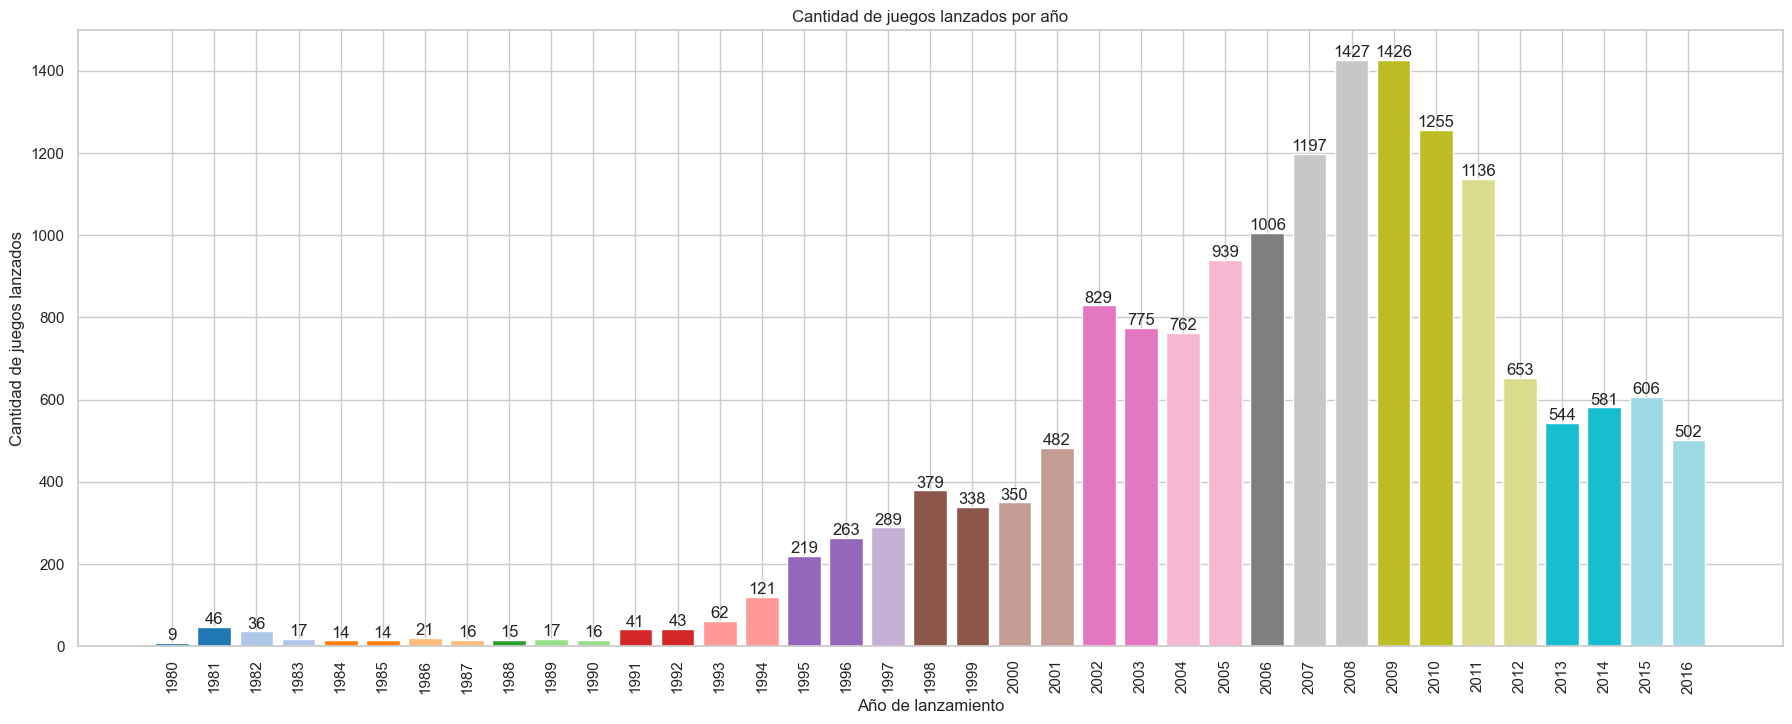

In [18686]:
# Haré un gráfico de barras para visualizar la tabla anterior.
plt.figure(figsize=(22, 8))
colors = plt.cm.tab20(np.linspace(0, 1, len(games_count_year)))
bars = plt.bar(games_count_year['year_of_release'], games_count_year['name'], color=colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos lanzados')
plt.title('Cantidad de juegos lanzados por año')
plt.xticks(games_count_year['year_of_release'], rotation=90)
plt.show()

Observo que durante una década (del 2002 al 2011) se registraron más de 700 juegos lanzados de manera anual siendo el 2008 y el 2009 los años con mayor cantidad de lanzamientos (1427 y 1426 respectivamente). 

In [18687]:
# Observaré cómo varían las ventas de una plataforma a otra.
sales_platform = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

# Elegiré las plataformas con las mayores ventas totales. 
top_10_sales_platform = sales_platform.head(10)['platform']
top_10_sales_platform

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     GBA
7     PS4
8     PSP
9      PC
Name: platform, dtype: object

In [18688]:
# Seleccionaré el top 10 de plataformas con mayores ventas dentro de mi DataFrame.
df_top_10_sales_platform = df_games[df_games['platform'].isin(top_10_sales_platform)]

# Mostraré las ventas totales por año y plataforma del top 10.
top_platform_sales_yearly = df_top_10_sales_platform.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
top_platform_sales_yearly = top_platform_sales_yearly[top_platform_sales_yearly['year_of_release'] != 0]
top_platform_sales_yearly

,year_of_release,platform,total_sales
9,1985,DS,0.02
10,1985,PC,0.04
11,1988,PC,0.03
12,1992,PC,3.03
13,1994,PC,12.87
...,...,...,...
121,2016,PC,5.25
122,2016,PS3,3.60
123,2016,PS4,69.25
124,2016,Wii,0.18


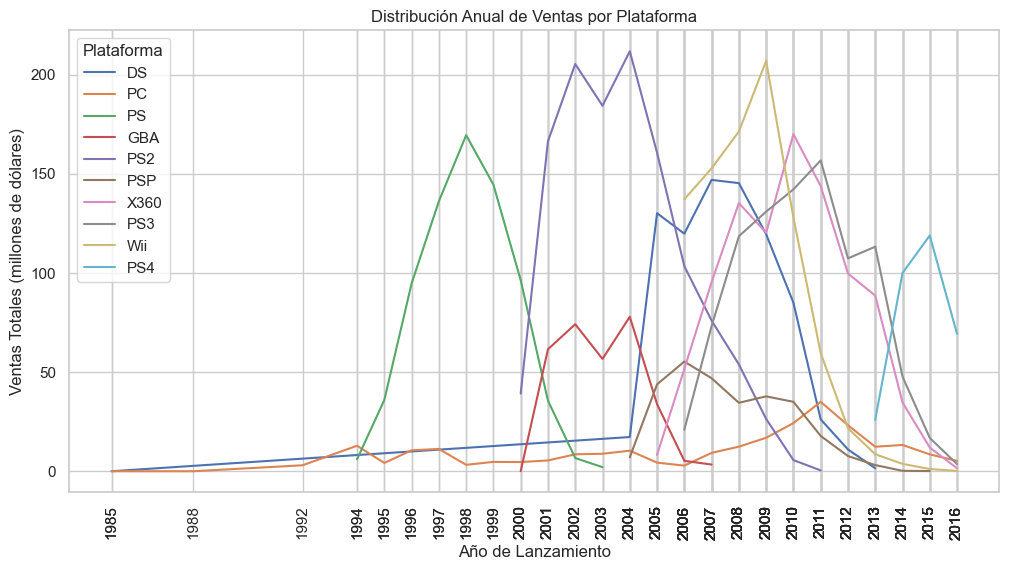

In [18689]:
# Construiré un gráfico de líneas basado en los datos de cada año.
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_platform_sales_yearly, x='year_of_release', y='total_sales', hue='platform')
plt.title('Distribución Anual de Ventas por Plataforma')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones de dólares)')
plt.legend(title='Plataforma')
plt.xticks(top_platform_sales_yearly['year_of_release'], rotation=90)
plt.grid(True)
plt.show()

Con este gráfico, puedo observar los picos de ventas de cada plataforma y me llama la atención PC ya que es la que esta en último lugar en este top 10 así que revisaré la rentabilidad de cada plataforma para confirmar que es una de las plataformas que más ventas totales genera.

In [18690]:
# Calcularé la rentabilidad de las plataformas.
sales_platform['z_score'] = (sales_platform['total_sales'] - sales_platform['total_sales'].mean())/sales_platform['total_sales'].std() 
sales_platform['color'] = ['red' if ventas_z < 0 else 'green' for ventas_z in sales_platform['z_score']]
sales_platform

,platform,total_sales,z_score,color
0,PS2,1255.77,2.780807,green
1,X360,971.42,1.964085,green
2,PS3,939.65,1.872834,green
3,Wii,907.51,1.780520,green
4,DS,806.12,1.489304,green
5,PS,730.86,1.273139,green
6,GBA,317.85,0.086875,green
7,PS4,314.14,0.076219,green
8,PSP,294.05,0.018516,green
9,PC,259.52,-0.080663,red


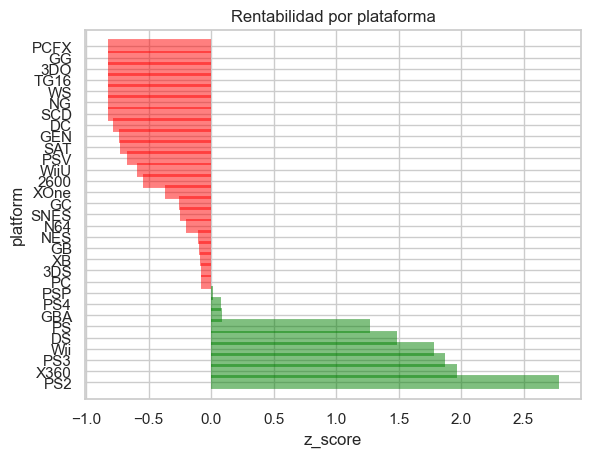

In [18691]:
# Generaré un gráfico de líneas donde las ventas en color ROJO indicarán que la plataforma NO ES RENTABLE. Si las ventas aparecen en VERDE indicará que la plataforma ES RENTABLE.
plt.figure( )
plt.hlines (
    y = sales_platform.platform, 
    xmin = 0,
    xmax = sales_platform.z_score,
    color = sales_platform.color,
    linewidth = 10,
    alpha = 0.5
)
plt.title('Rentabilidad por plataforma')
plt.xlabel('z_score')
plt.ylabel('platform')
plt.show()


Con este gráfico, puedo visualizar que la plataforma PC no es rentable. 

Unicamente han sido rentables: PS2, X360, PS3, Wii, DS, PS, GBA, PS4 y PSP.

In [18692]:
# Buscaré las plataformas que solían ser populares pero que ahora no tienen ventas. 
last_year = df_games['year_of_release'].max()
platforms_with_sales = df_games.groupby('platform')['year_of_release'].max().reset_index()
platforms_no_recent_sales = platforms_with_sales[platforms_with_sales['year_of_release'] < last_year]
platforms_no_recent_sales


,platform,year_of_release
0,2600,1989
1,3DO,1995
3,DC,2008
4,DS,2013
5,GB,2001
6,GBA,2007
7,GC,2007
8,GEN,1994
9,GG,1992
10,N64,2002


In [18693]:
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
df_games_no_zero = df_games[df_games['year_of_release'] != 0]
platform_lifetime = df_games_no_zero.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
platform_lifetime.columns = ['platform', 'first_year', 'last_year']
platform_lifetime['duration'] = platform_lifetime['last_year'] - platform_lifetime['first_year']
platform_lifetime


,platform,first_year,last_year,duration
0,2600,1980,1989,9
1,3DO,1994,1995,1
2,3DS,2011,2016,5
3,DC,1998,2008,10
4,DS,1985,2013,28
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4
9,GG,1992,1992,0


In [18694]:
# Calcularé el tiempo promedio de vida de las nuevas plataformas (de los últimos 10 años).
new_platforms = platform_lifetime[platform_lifetime['first_year'] > (last_year - 10)]
average_new_platform_duration = new_platforms['duration'].mean()
average_new_platform_duration.round(2)

np.float64(4.0)

El resultado es de 4.0 años, lo que significa que en promedio, las nuevas plataformas suelen estar activas durante 4 años.

In [18695]:
# Calcularé el tiempo promedio de vida de las antiguas plataformas.
old_platforms = platform_lifetime[platform_lifetime['last_year'] < last_year]
average_old_platform_duration = old_platforms['duration'].mean()
average_old_platform_duration.round(2)

np.float64(7.0)

El resultado es de 7.0 años, lo que indica que en promedio, las plataformas antiguas solían tener una vida útil de 7 años antes de desaparecer del mercado.

Periodo para análisis: 2007 - 2016 

Elegiré este período porque considero que cubre lo suficiente para encontrar tanto la aparición (4 años) como la desaparición de plataformas (7años). 

Con ello, tengo mayor seguridad para poder construir un modelo más adelante para el 2017.

In [18696]:
# Filtraré nuevamente mi DataFrame para que solo tenga del 2007 en adelante.
df_games_period = df_games[df_games['year_of_release'] >= 2007]
df_games_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,71,7.5,Desconocido,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,71,7.5,Desconocido,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71,7.5,Desconocido,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71,7.5,Desconocido,0.01


In [18697]:
# Calcularé el total de ventas para cada plataforma rentable por año.
total_sales_platform_2007_2016 = df_games_period.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
pivot_table = total_sales_platform_2007_2016.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)
pivot_table

# ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2007,0.00,0.02,146.94,3.4,0.27,9.28,75.99,73.19,0.00,46.93,0.00,152.77,0.00,95.41,0.55,0.00
2008,0.00,0.04,145.31,0.0,0.00,12.42,53.90,118.52,0.00,34.55,0.00,171.32,0.00,135.26,0.18,0.00
2009,0.00,0.00,119.54,0.0,0.00,16.91,26.40,130.93,0.00,37.78,0.00,206.97,0.00,120.29,0.00,0.00
2010,0.00,0.00,85.02,0.0,0.00,24.28,5.64,142.17,0.00,35.04,0.00,127.95,0.00,170.03,0.00,0.00
2011,63.20,0.00,26.18,0.0,0.00,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00,0.00
2012,51.36,0.00,11.01,0.0,0.00,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00,0.00
2013,56.57,0.00,1.54,0.0,0.00,12.38,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,0.00,18.96
2014,43.76,0.00,0.00,0.0,0.00,13.28,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,0.00,54.07
2015,27.78,0.00,0.00,0.0,0.00,8.52,0.00,16.82,118.90,0.12,6.25,1.14,16.35,11.96,0.00,60.14


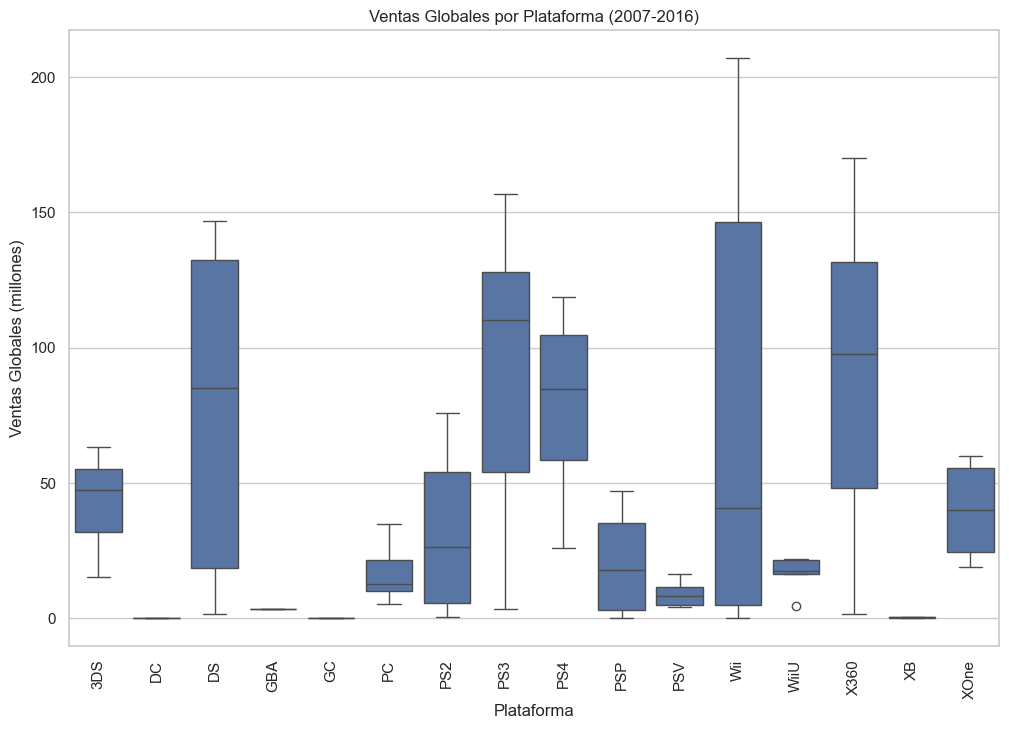

In [18698]:
# Crearé un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=total_sales_platform_2007_2016)
plt.title('Ventas Globales por Plataforma (2007-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=90)
plt.show()

In [18699]:
# Calcularé el promedio de ventas de cada plataforma.
average_sales_platform = pivot_table.mean().sort_values(ascending=False).reset_index()
average_sales_platform.columns = ('platform', 'averange_sales')
average_sales_platform

,platform,averange_sales
0,PS3,91.038
1,X360,90.137
2,Wii,75.403
3,DS,53.554
4,PS4,31.414
5,3DS,25.781
6,PSP,18.331
7,PS2,16.238
8,PC,16.057
9,XOne,15.932


¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?

De acuerdo con el gráfico y el promedio de ventas, puedo observar que:

* Las plataformas PS3, X360, y Wii muestran las ventas promedio más altas. Esto puede ser porque los juegos que ofrecen han dado buenos resultados en ventas. Sin embargo, también estas plataformas muestran una alta variabilidad de ventas; quizá porque tienen juegos mucho más rentables que otros. 

* Por el contrario, plataformas como GBA, XB, GC y DC tienen las ventas promedio más bajas de la lista. Sin embargo, muestran menos variabilidad.
Esto indica un rendimiento más homogéneo aún cuando las ventas nos sean tan fuertes en general.

* Por lo tanto, hasta el momento observo que hay una diferencia significativa en las ventas de cada plataforma y que algunas comparten cierto comportamiento en cuanto a variabilidad y éxito en las ventas.

Observaré el impacto de las reseñas de usuarios y profesionales en las ventas de Wii.

In [18700]:
# Revisó las reseñas de usuarios y profesionales de Wii.
df_wii = df_games.query('platform == "Wii" and year_of_release != 0')
average_scores_wii = df_wii.groupby('year_of_release').agg({'critic_score': 'mean', 'user_score': 'mean'}).reset_index()
average_scores_wii.round(2)

,year_of_release,critic_score,user_score
0,2006,64.77,6.96
1,2007,64.48,6.82
2,2008,65.71,7.01
3,2009,67.66,7.34
4,2010,69.23,7.41
5,2011,69.67,7.28
6,2012,71.84,7.23
7,2013,71.00,6.38
8,2014,71.00,7.12
9,2015,71.00,7.50


In [18701]:
# Calcularé la correlación entre las reseñas y las ventas.
correlation_user_sales = df_wii['user_score'].corr(df_wii['total_sales']).round(4)
print(f"La correlación entre las reseñas del usuario y las ventas totales es: {correlation_user_sales}")
correlation_critic_sales = df_wii['critic_score'].corr(df_wii['total_sales']).round(4)
print(f"La correlación entre las reseñas de los críticos y las ventas totales es: {correlation_critic_sales}")


La correlación entre las reseñas del usuario y las ventas totales es: 0.0557
La correlación entre las reseñas de los críticos y las ventas totales es: 0.1065


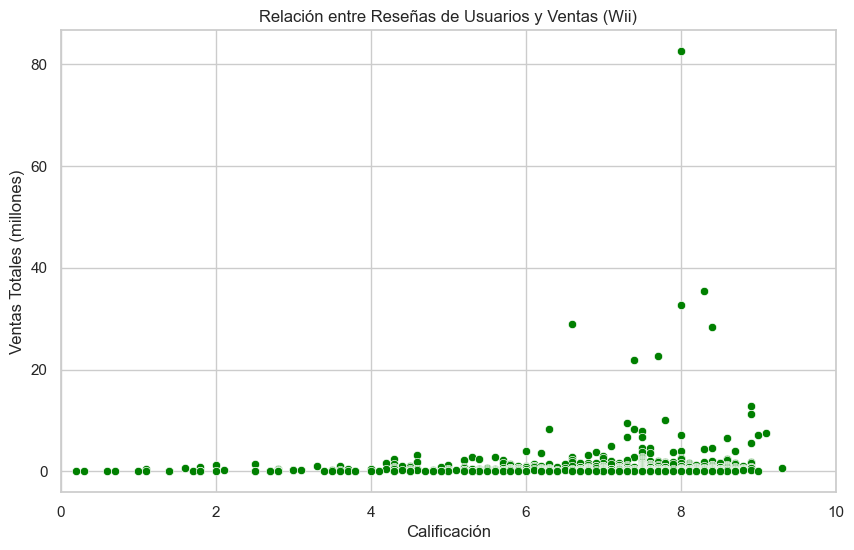

In [18702]:
# Crearé un gráfico de dispersión para mostrar las reseñas de los usuarios y las ventas totales.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=df_wii, color='green')
plt.title('Relación entre Reseñas de Usuarios y Ventas (Wii)')
plt.xlabel('Calificación')
plt.ylabel('Ventas Totales (millones)')
plt.xlim(0, 10)
plt.show()


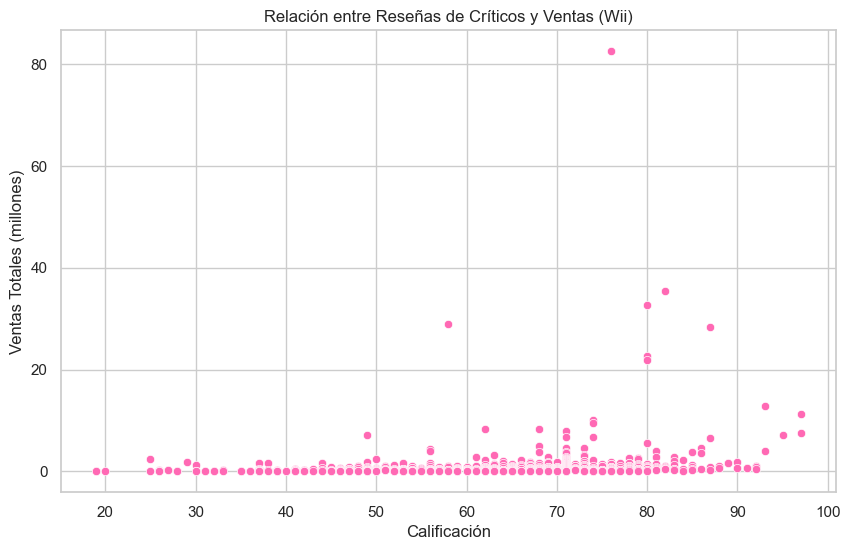

In [18703]:
# Crearé un gráfico de dispersión para las reseñas de críticos y las ventas totales.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=df_wii, color='hotpink')
plt.title('Relación entre Reseñas de Críticos y Ventas (Wii)')
plt.xlabel('Calificación')
plt.ylabel('Ventas Totales (millones)')
plt.show()

* La correlación de 0.0557 muestra una relación muy débil entre las reseñas de los usuarios y las ventas totales. Es decir, tal parece que la calificación que dan los usuarios NO AFECTA de manera significativa en las ventas de Wii.

* La correlación de 0.1065 muestra una relación débil entre las reseñas de los críticos y las ventas totales. Es decir, tal parece que las reseñas de los críticos NO AFECTA de manera significativa en las ventas de Wii.
  
* Ambas gráficas de dispersión muestran poca relación entre las calificaciones, tanto de los usuarios como de los críticos, y las ventas totales.
  
* Observo que la mayoría de los puntos estan por debajo de los 20 millones de dólares, lo que indica que por lo regular Wii genera menos de este importe aunque también observo algunos datos atípicos, sobretodo en la zona donde las calificaciones van del 7 al 9 y las ventas superan los 20 millones de dólares.

Los datos hasta el momento, sugieren que las calificaciones para Wii no son un buen predictor para hacer una proyección de ventas para el 2017. 

Haré una comparación de las ventas totales de Wii con otras plataformas para ver como se comportan los datos y encontrar posibles relaciones.


In [18704]:
# Revisaré las ventas totales por año de 'Wii', 'PS3', 'X360', 'PSV' y 'GBA'.
platforms_to_compare = ['Wii', 'PS3', 'X360', 'PSV', 'GBA']
df_platforms_compare = df_games_period[df_games_period['platform'].isin(platforms_to_compare)]
total_sales_platforms = df_platforms_compare.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
total_sales_platforms

,platform,year_of_release,total_sales
0,GBA,2007,3.40
1,PS3,2007,73.19
2,PS3,2008,118.52
3,PS3,2009,130.93
4,PS3,2010,142.17
5,PS3,2011,156.78
6,PS3,2012,107.36
7,PS3,2013,113.25
8,PS3,2014,47.76
9,PS3,2015,16.82


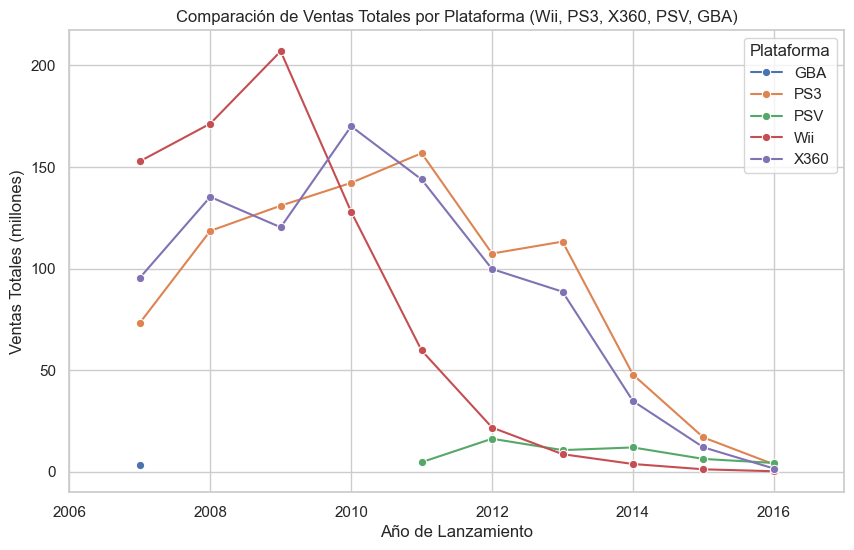

In [18705]:
# Realizaré un gráfico de líneas para ver el comportamiento de las ventas totales anuales de cada plataforma. 
plt.figure(figsize=(10, 6))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=total_sales_platforms, marker='o')

plt.title('Comparación de Ventas Totales por Plataforma (Wii, PS3, X360, PSV, GBA)')
plt.xlim(2006, 2017)
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma')
plt.show()

Observo que 4 de las 5 plataformas que elegí se realizaron en 2007 teniendo Wii la mayor cantidad de ventas en 2009 pero también la mayor caida de ventas de las cinco plataformas.

En general, a partir del 2014, las 5 plataformas experimentaron bajas ventas y no se observa que se hayan recuperado para el 2016.

Ahora veré qué pasa con las ventas anuales totales por género y si existe alguna tendencia.



In [18706]:
# Echaré un vistazo a la distribución general de los juegos por género. 
total_sales_genre= df_games_period.groupby(['genre', 'year_of_release'])['total_sales'].sum().reset_index()
total_sales_genre

,genre,year_of_release,total_sales
0,Action,2007,104.85
1,Action,2008,134.96
2,Action,2009,137.69
3,Action,2010,115.29
4,Action,2011,116.68
...,...,...,...
115,Strategy,2012,3.26
116,Strategy,2013,6.12
117,Strategy,2014,0.98
118,Strategy,2015,1.85


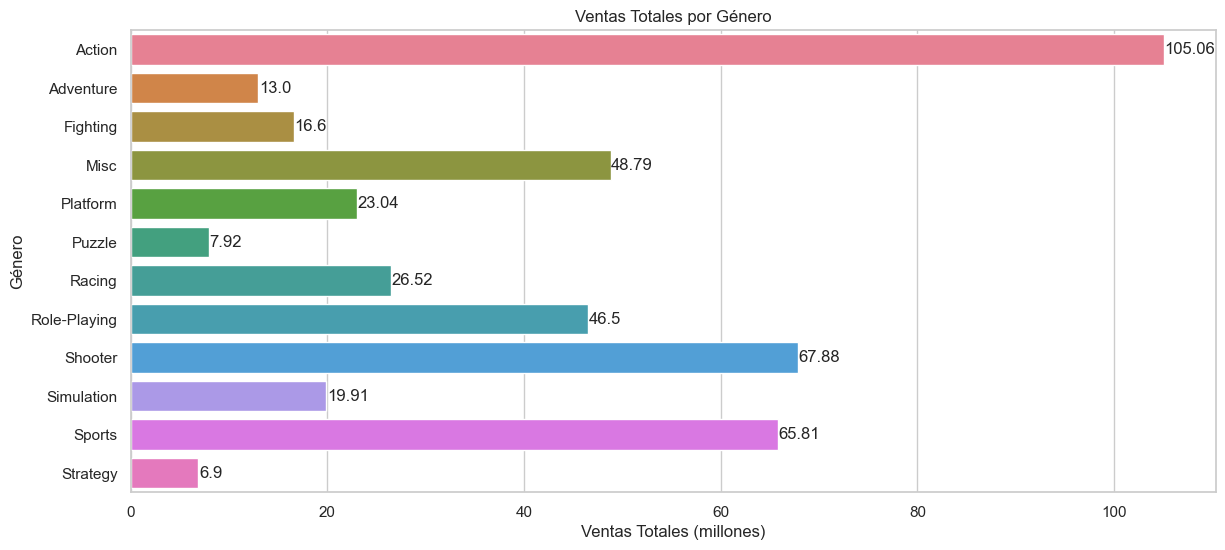

In [18707]:
# Haré un gráfico de barras horizontal para conocer las ventas totales por género.
plt.figure(figsize=(14, 6))
bar_plot = sns.barplot(x='total_sales', y='genre', data = total_sales_genre, hue='genre', errorbar=None)

# Agregaré etiquetas a cada barra.
for bar in bar_plot.patches:
    bar_width = bar.get_width()
    bar_height = bar.get_height()

    plt.text(bar_width + 0.05, bar.get_y() + bar_height / 2, round(bar_width, 2), 
             ha='left', va='center')

plt.title('Ventas Totales por Género')
plt.xlabel('Ventas Totales (millones)')
plt.ylabel('Género')
plt.show()

Puedo ver claramente que los juegos de acción son los favoritos pues alcanzan ventas totales de poco más de 105 millones, casí el doble que los juegos de tirador y los de deportes.

Los juegos con más ventas son los de Acción, los de Tirador y los de Deportes. En cambio, los que tienen menos ventas son los de Rompecabezas y los de Estrategía.

Veré la rentabilidad de los juegos con base en el género.

In [18708]:
# Obtendré la rentabilidad de cada género.
total_sales_genre['z_score'] = (total_sales_genre['total_sales'] - total_sales_genre['total_sales'].mean())/total_sales_genre['total_sales'].std() 
total_sales_genre['color'] = ['red' if ventas_z < 0 else 'green' for ventas_z in total_sales_genre['z_score']]
total_sales_genre

,genre,year_of_release,total_sales,z_score,color
0,Action,2007,104.85,1.920018,green
1,Action,2008,134.96,2.776204,green
2,Action,2009,137.69,2.853832,green
3,Action,2010,115.29,2.216882,green
4,Action,2011,116.68,2.256407,green
...,...,...,...,...,...
115,Strategy,2012,3.26,-0.968721,red
116,Strategy,2013,6.12,-0.887396,red
117,Strategy,2014,0.98,-1.033553,red
118,Strategy,2015,1.85,-1.008815,red


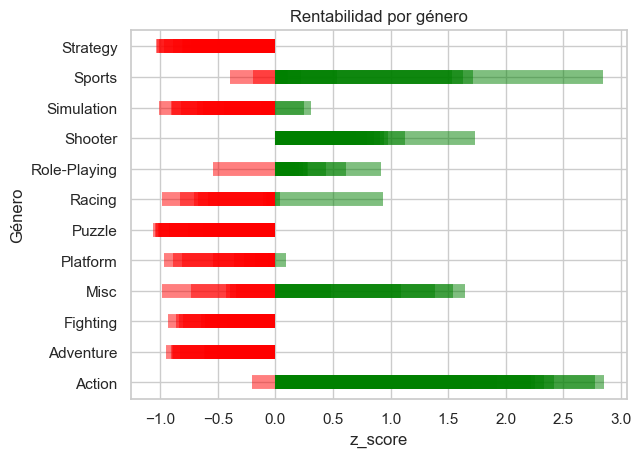

In [18709]:
# Haré un gráfico de líneas para mostrar la rentabilidad de los juego por género.
plt.figure( )
plt.hlines (
    y = total_sales_genre.genre, 
    xmin = 0,
    xmax = total_sales_genre.z_score,
    color = total_sales_genre.color,
    linewidth = 10,
    alpha = 0.5
)
plt.title('Rentabilidad por género')
plt.xlabel('z_score')
plt.ylabel('Género')
plt.show()


En este gráfico, puedo observar que los juegos de tirador y los de acción son los más rentables. Es mejor considerar el lanzamiento de juegos de estrategía, rompecabezas, pelea y aventura ya que son los menos rentables.

### CONCLUSIONES PRELIMINARES


Pude identificar patrones en el comportamiento del mercado de videojuegos en el periodo 2002 - 2016, tales como:

* Entre 2008 y 2009, hubo un pico de lanzamientos donde la industria vivió un auge significativo, aunque algunas plataformas, como PC, no fueron rentables en términos de ventas. 

* La vida útil promedio de las plataformas varía según su antigüedad; las antiguas de 7 años y las nuevas de 4 años. 

* Plataformas como PS3, X360 y Wii dominaron en ventas, aunque observé una alta variabilidad.

* Las reseñas de usuarios y de críticos influyen de manera poco significativa sobre las ventas totales, especialmente en Wii.

* En cuanto al género, los juegos de Acción y Tirador son los más rentables, mientras que los de Estrategia y Rompecabezas muestran un desempeño limitado.

## Creación de un perfil de usuario para cada región

In [18710]:
# Haré una función para agrupar las ventas totales por plataforma y región, renombrar las columnas y obtener las cinco plataformas principales para cada región.
def top_region_platform(region):
    reg_sales = df_games.groupby('platform')[region].sum().reset_index()
    reg_sales.columns = ['platform', region]
    reg_platforms = reg_sales.sort_values(by=region, ascending=False)
    return reg_platforms

na_platforms = top_region_platform('na_sales')
eu_platforms = top_region_platform('eu_sales')
jp_platforms = top_region_platform('jp_sales')

top_na_platforms = na_platforms.head(5)
top_eu_platforms = eu_platforms.head(5)
top_jp_platforms = jp_platforms.head(5)

print(top_na_platforms)
print(top_eu_platforms)
print(top_jp_platforms)

   platform  na_sales
28     X360    602.47
16      PS2    583.84
26      Wii    496.90
17      PS3    393.49
4        DS    382.40
   platform  eu_sales
16      PS2    339.29
17      PS3    330.29
28     X360    270.76
26      Wii    262.21
15       PS    213.61
   platform  jp_sales
4        DS    175.57
15       PS    139.82
16      PS2    139.20
23     SNES    116.55
2       3DS    100.67


In [18711]:
# Haré una función para calcular la cuota de mercado para cada región.
def cuota_mercado(df, sales_col):
    total_sales = df[sales_col].sum()
    df = df.assign(**{f'market_share_{sales_col}': ((df[sales_col] / total_sales) * 100).round(2)})
    return df

cuota_na_platforms = cuota_mercado(top_na_platforms, 'na_sales')
cuota_eu_platforms = cuota_mercado(top_eu_platforms, 'eu_sales')
cuota_jp_platforms = cuota_mercado(top_jp_platforms, 'jp_sales')

print(cuota_na_platforms)
print(cuota_eu_platforms)
print(cuota_jp_platforms)


   platform  na_sales  market_share_na_sales
28     X360    602.47                  24.50
16      PS2    583.84                  23.74
26      Wii    496.90                  20.21
17      PS3    393.49                  16.00
4        DS    382.40                  15.55
   platform  eu_sales  market_share_eu_sales
16      PS2    339.29                  23.96
17      PS3    330.29                  23.32
28     X360    270.76                  19.12
26      Wii    262.21                  18.52
15       PS    213.61                  15.08
   platform  jp_sales  market_share_jp_sales
4        DS    175.57                  26.13
15       PS    139.82                  20.81
16      PS2    139.20                  20.72
23     SNES    116.55                  17.35
2       3DS    100.67                  14.98


In [18712]:
# Añadiré una columna para la región en cada DataFrame y haré una tabla con todas las cuotas calculadas. 
cuota_na_platforms['region'] = 'NA'
cuota_eu_platforms['region'] = 'EU'
cuota_jp_platforms['region'] = 'JP'


cuota_mercado_all = pd.concat([
    cuota_na_platforms[['platform', 'market_share_na_sales', 'region']],
    cuota_eu_platforms[['platform', 'market_share_eu_sales', 'region']],
    cuota_jp_platforms[['platform', 'market_share_jp_sales', 'region']]
])

cuota_mercado_all = cuota_mercado_all.rename(columns={
    'market_share_na_sales': 'Market Share (NA)',
    'market_share_eu_sales': 'Market Share (EU)',
    'market_share_jp_sales': 'Market Share (JP)'
})

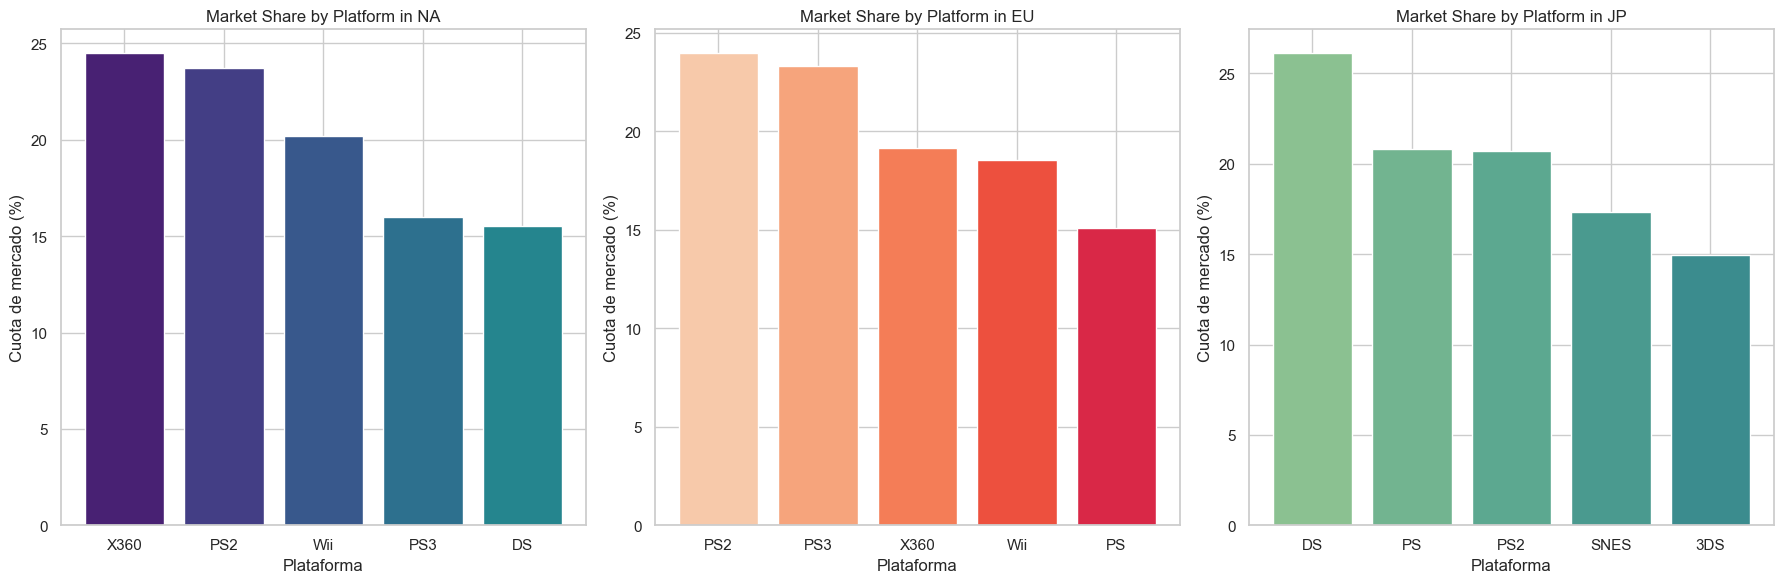

In [18713]:
# Crearé un set de gráficos para poder observar todas la cuotas de las plataformas según su región.
palettes = {
    'NA': sns.color_palette("viridis", n_colors=10),
    'EU': sns.color_palette("rocket_r", n_colors=10),
    'JP': sns.color_palette("crest", n_colors=10)
}

plt.figure(figsize=(18, 6))
for i, region in enumerate(['NA', 'EU', 'JP']):
    plt.subplot(1, 3, i+1)
    data = cuota_mercado_all[cuota_mercado_all['region'] == region]
    colors = palettes[region]
    plt.bar(data['platform'], data[f'Market Share ({region})'], color=colors)
    plt.xlabel('Plataforma')
    plt.ylabel('Cuota de mercado (%)')
    plt.title(f'Market Share by Platform in {region}')
    plt.tight_layout()

plt.show()


Puedo observar que:

* PS2 es la plataforma más popular y fuerte ya que se encuentra con un buen porcentaje en todas las regiones. 

* X360, PS3 y Wii también tienen buena popularidad en casi todas las regiones (excepto en Japón). 

* DS es muy popular en Japon y en menor porcentaje pero presente en Norteamérica. 

* SNES y 3DS son plataformas que solo figuran en Japón pero no están en el foco en las demás regiones.

* PS2 y PS3 dominan el mercado, en Europa mientras que en Norteamérica X360 es el favorito.

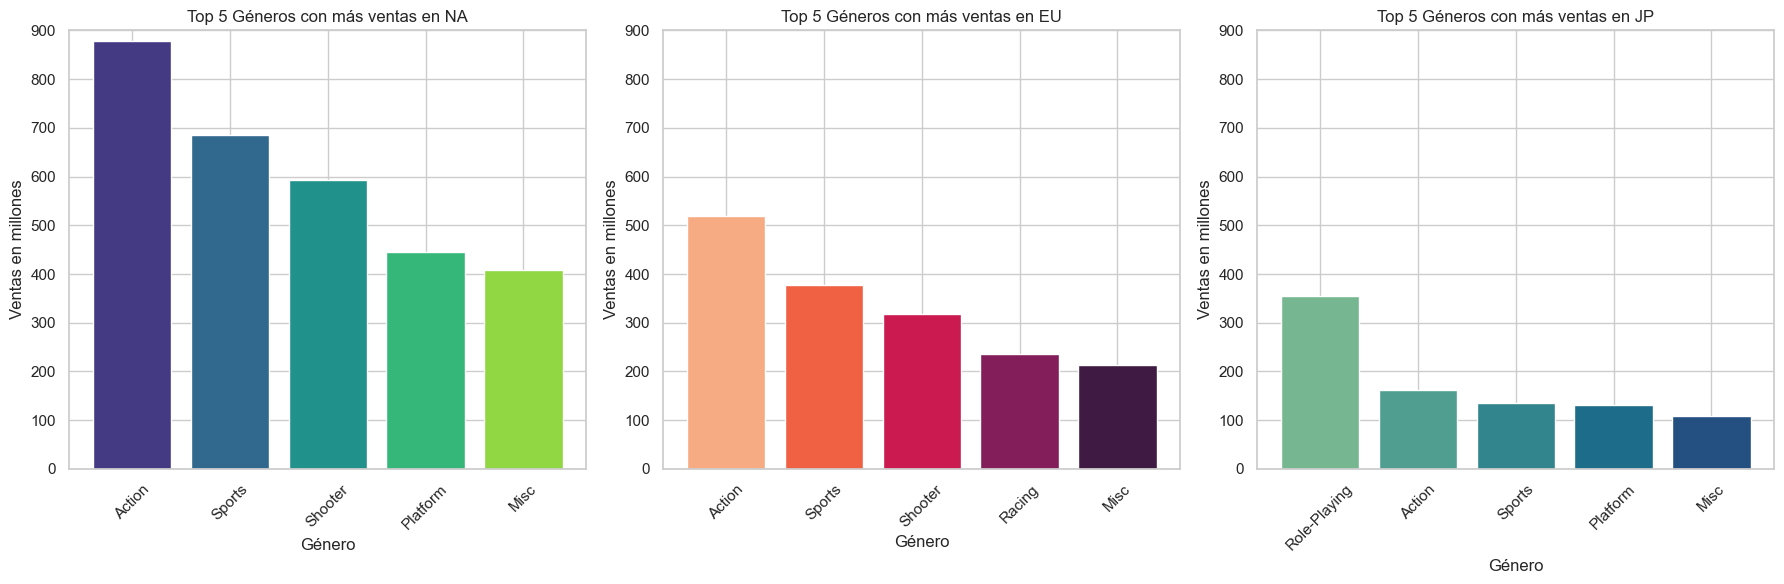

In [18714]:
# Analizaré los cinco géneros principales y sus diferencias.
regions = {
    'NA': 'na_sales',
    'EU': 'eu_sales',
    'JP': 'jp_sales'
}

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()

palettes = {
    'NA': sns.color_palette("viridis", n_colors=5),
    'EU': sns.color_palette("rocket_r", n_colors=5),
    'JP': sns.color_palette("crest", n_colors=5)
}

for i, (region, sales_column) in enumerate(regions.items()):
    genre_sales = df_games.groupby('genre')[sales_column].sum().sort_values(ascending=False).head(5)
    colors = palettes[region][:len(genre_sales)]
    
    axes[i].bar(genre_sales.index, genre_sales.values, color=colors)
    axes[i].set_title(f'Top 5 Géneros con más ventas en {region}')
    axes[i].set_xlabel('Género')
    axes[i].set_ylabel('Ventas en millones')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(0, 900)
    axes[i].set_yticks(range(0, 1000, 100))

plt.tight_layout()
plt.show()

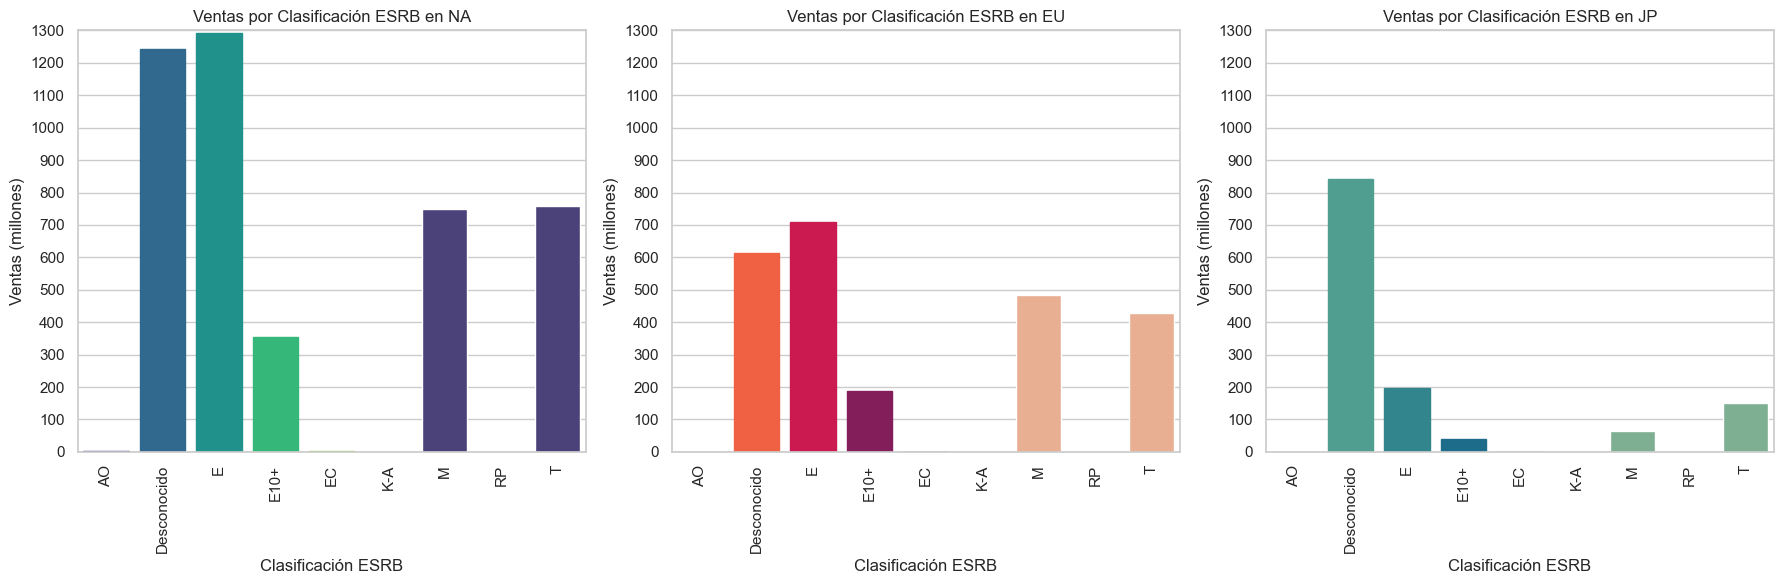

In [18715]:
# Revisaré si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()

for i, (region, sales_column) in enumerate(regions.items()):
    esrb_sales = df_games.groupby('rating')[sales_column].sum()
    
    n_colors = len(esrb_sales)
    palette = sns.color_palette(palettes[region][:n_colors])
    bars = sns.barplot(x=esrb_sales.index, y=esrb_sales.values, ax=axes[i], color=palette[0])
    
    for bar, color in zip(bars.patches, palette):
        bar.set_color(color)
    
    axes[i].set_title(f'Ventas por Clasificación ESRB en {region}')
    axes[i].set_xlabel('Clasificación ESRB')
    axes[i].set_ylabel('Ventas (millones)')
    axes[i].set_ylim(0, 1300)
    axes[i].set_yticks(range(0, 1400, 100))
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Observo que algunas categorías de clasificación tienen diferentes niveles de ventas pero en cada región influyen de manera diversa. 

La categoría E(Todos) tiene mayor impacto en ventas en Norteamérica, Europa y Japón. Sin embargo, en mis datos hay una gran cantidad de películas sin categoría especificada para todas las regiones. 

Las categorías de clasificación M(+17 años) y T(Adolescentes) estan en un nivel medio de popularidad en todas las regiones. Sin embargo, pareciera que en Japón las categorías impactan en menor manera que en Norteamérica.


### CONCLUSIONES PRELIMINARES

Para el perfil de usuario para cada región obtuve los siguientes hallazgos que revelan diferencias marcadas en la popularidad de las plataformas y las clasificaciones de juegos: 

  * PLATAFORMAS:
    - PS2 es la plataforma más fuerte en todas las regiones. X360, PS3 y Wii tambien son populares, excepto en Japón. 
    - DS, SNES y 3DS son populares en Japón, mientras que X360 domina el mercado en Norteamérica y PS2 y PS3 domina el mercado en Europa.

  * CATEGORÍAS DE CLASIFICACIÓN:
    - La categoría E (para todos) tiene el mayor impacto en ventas en todas las regiones, mientras que las categorías M (mayores de 17 años) y T (adolescentes) tienen una influencia media.
    - EN general, las clasificaciones parecen afectar menos en Japón en comparación con Norteamérica, lo que pudiera sugerir diferencias culturales y de mercado en cada región.

## Prueba de hipótesis

Antes empezar con las pruebas, quisiera marcar algunos puntos importantes:

* Utilizaré un umbral alfa (nivel de significancia) en 0.05, considerado el estandar.

* Para ambas pruebas, utilizaré la prueba T de dos muestras independientes ya que estaré intentando comparar las medias de dos grupos diferentes para determinar si hay similitudes entre ellas o son diferentes una de la otra.

* Intentaré realizar la prueba de Levene para confirmar la igualdad de varianzas en ambos grupos y, con ello, determinar si uso la Prueba T estandar o la Prueba T para varianzas desiguales.

### PRUEBA 1. Calificaciones promedio de los usuarios para las plataformas Xbox One y PC.

* Hipótesis Nula (H0) = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

* Hipótesis Alternativa (H1) = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [18716]:
# Filtraré los datos para obtener el user_score de Xbox One y PC.
ratings_xone = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()
ratings_pc = df_games[df_games['platform'] == 'PC']['user_score'].dropna()
print(f"Tamaño de la muestra para XOne: {len(ratings_xone)}")
print(f"Tamaño de la muestra para PC: {len(ratings_pc)}")

Tamaño de la muestra para XOne: 247
Tamaño de la muestra para PC: 974


In [18717]:
# Realizaré la prueba de Levene.
levene_platform = st.levene(ratings_xone, ratings_pc)
print(f"T-statistic: {levene_platform.statistic}")
print(f"P-value: {levene_platform.pvalue}")

T-statistic: 7.777487276480662e-05
P-value: 0.9929649852182456


In [18718]:
# El p-value es de 0.9929 por lo que asumiré que las varianzas entre las calificaciones de usuarios para las plataformas XOne y PC son iguales.
alpha = 0.05

equal_var_levene = levene_platform.pvalue > alpha
print(equal_var_levene)
ttest_platform = st.ttest_ind(ratings_xone, ratings_pc)
print(ttest_platform.pvalue)

if ttest_platform.pvalue < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en las calificaciones promedio de los usuarios entre las plataformas XOne y PC.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que no hay una diferencia significativa en las calificaciones promedio de los usuarios entre las plataformas XOne y PC.")

True
0.00010123955107193582
Rechazamos la hipótesis nula. Hay una diferencia significativa en las calificaciones promedio de los usuarios entre las plataformas XOne y PC.


* El valor pvalue en la Prueba t es 0.0001, que es mucho menor que alpha de 0.05 por lo que rechazamos la hipótesis nula. 

* Podemos afirmar entonces que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.


### PRUEBA 2. Las calificaciones promedio para los géneros de Acción y Deportes.

* Hipótesis Nula (H0) = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.

* Hipótesis Alternativa (H1) = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [18719]:
# Filtraré los datos para obtener el user_score de Xbox One y PC.
ratings_action = df_games[df_games['genre'] == 'Action']['user_score'].dropna()
ratings_sports = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()
print(f"Tamaño de la muestra para Action: {len(ratings_action)}")
print(f"Tamaño de la muestra para Sports: {len(ratings_sports)}")

Tamaño de la muestra para Action: 3369
Tamaño de la muestra para Sports: 2348


In [18720]:
# Realizaré la prueba de Levene.
levene_genre = st.levene(ratings_action, ratings_sports)
print(f"T-statistic: {levene_genre.statistic}")
print(f"P-value: {levene_genre.pvalue}")

T-statistic: 0.16699629968166063
P-value: 0.6828105166182066


In [18721]:
# El p-value es de 0.6828 por lo que asumiré que las varianzas entre las calificaciones de usuarios para los géneros Action y Sports son iguales.
equal_var_levene_2 = levene_genre.pvalue > alpha
print(equal_var_levene_2)
ttest_genre = st.ttest_ind(ratings_action, ratings_sports)
print(ttest_genre.pvalue)

if ttest_genre.pvalue < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en las calificaciones promedio de los usuarios para los géneros Action y Sports.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para los géneros Action y Sports son diferentes.")

True
0.7131417795320426
No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para los géneros Action y Sports son diferentes.


* El valor pvalue en la Prueba t es 0.0001, que es mucho menor que alpha de 0.05 por lo que rechazamos la hipótesis nula. 

* Podemos afirmar entonces que las calificaciones promedio de los géneros Action y Sports no son significativamente diferentes.


### CONCLUSIONES PRELIMINARES

En las pruebas de hipótesis realizadas, se observaron dos hallazgos clave:

* En la primera prueba, donde comparaba las calificaciones promedio de los usuarios para las plataformas Xbox One y PC, se encontró una diferencia significativa. El pvalue de 0.0001, mucho menor que el umbral alfa de 0.05, me permitió rechazar la hipótesis nula y concluir que LAS CALIFICACIONES PROMEDIO PARA XBOX ONE Y PC SON DIFERENTES.

* En la segunda prueba, al comparar las calificaciones promedio de los géneros de Acción y Deportes, no se encontró evidencia suficiente para rechazar la hipótesis nula. El pvalue de 0.713 me permitió concluir con que NO HAY UNA DIFERENCIA SIGNIFICATIVA ENTRE LAS CALIFICACIONES PROMEDIO DE ESTOS ACTION Y SPORTS.

## Conclusión general

Durante este proyecto, he analizado datos relacionados con videojuegos como su plataforma, género, año de lanzamiento, ventas por región, clasificación y sus calificaciones de usuarios y profesionales. Esto, con el objetivo de identificar patrones que determinen si un juego tiene éxito o no.

A continuación enlistaré mis hallazgos:

1. Identifiqué que el mercado de lanzamientos tuvo su mayor auge entre 2002 y 2011, específicamente durante el 2008 y 2009. Sin embargo, plataformas como PC fueron menos rentables en comparación con otras como PS3, X360 o Wii, las cuales dominaron tanto en ventas promedio como en rentabilidad durante este periodo. 
   
2. Pude determinar que las plataformas nuevas tienden a tener un ciclo de vida más corto (alrededor de 4 años), en comparación con las antiguas, las cuales han perdurado en el mercado durante un promedio de 7 años.

3. Observé que las plataformas más populares y dominantes varían según la región, siendo PS2 y PS3 las más fuertes en Europa, mientras que X360 lideró en Norteamérica. En Japón, plataformas como la SNES y 3DS fueron más populares. 
   
4. Encontré que las clasificaciones de contenido, como la categoría E (para todos), influyen en las ventas de manera particular según la región, teniendo mayor influencia en Norteamérica y Europa.

5. Las calificaciones promedio de los usuarios varían significativamente entre las plataformas Xbox One y PC.

6. No hubo diferencias significativas en las calificaciones de los géneros de Acción y Deportes. 